In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import requests, zipfile
import io
from io import StringIO
%precision 4
%matplotlib inline

#### 総合問題 3-1

In [7]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
r = requests.get(url, stream=True)

In [4]:
r = requests.get(url)

In [10]:
io.BytesIO(r.content)

In [14]:
df.describe().to_csv('ch3_summary.csv')

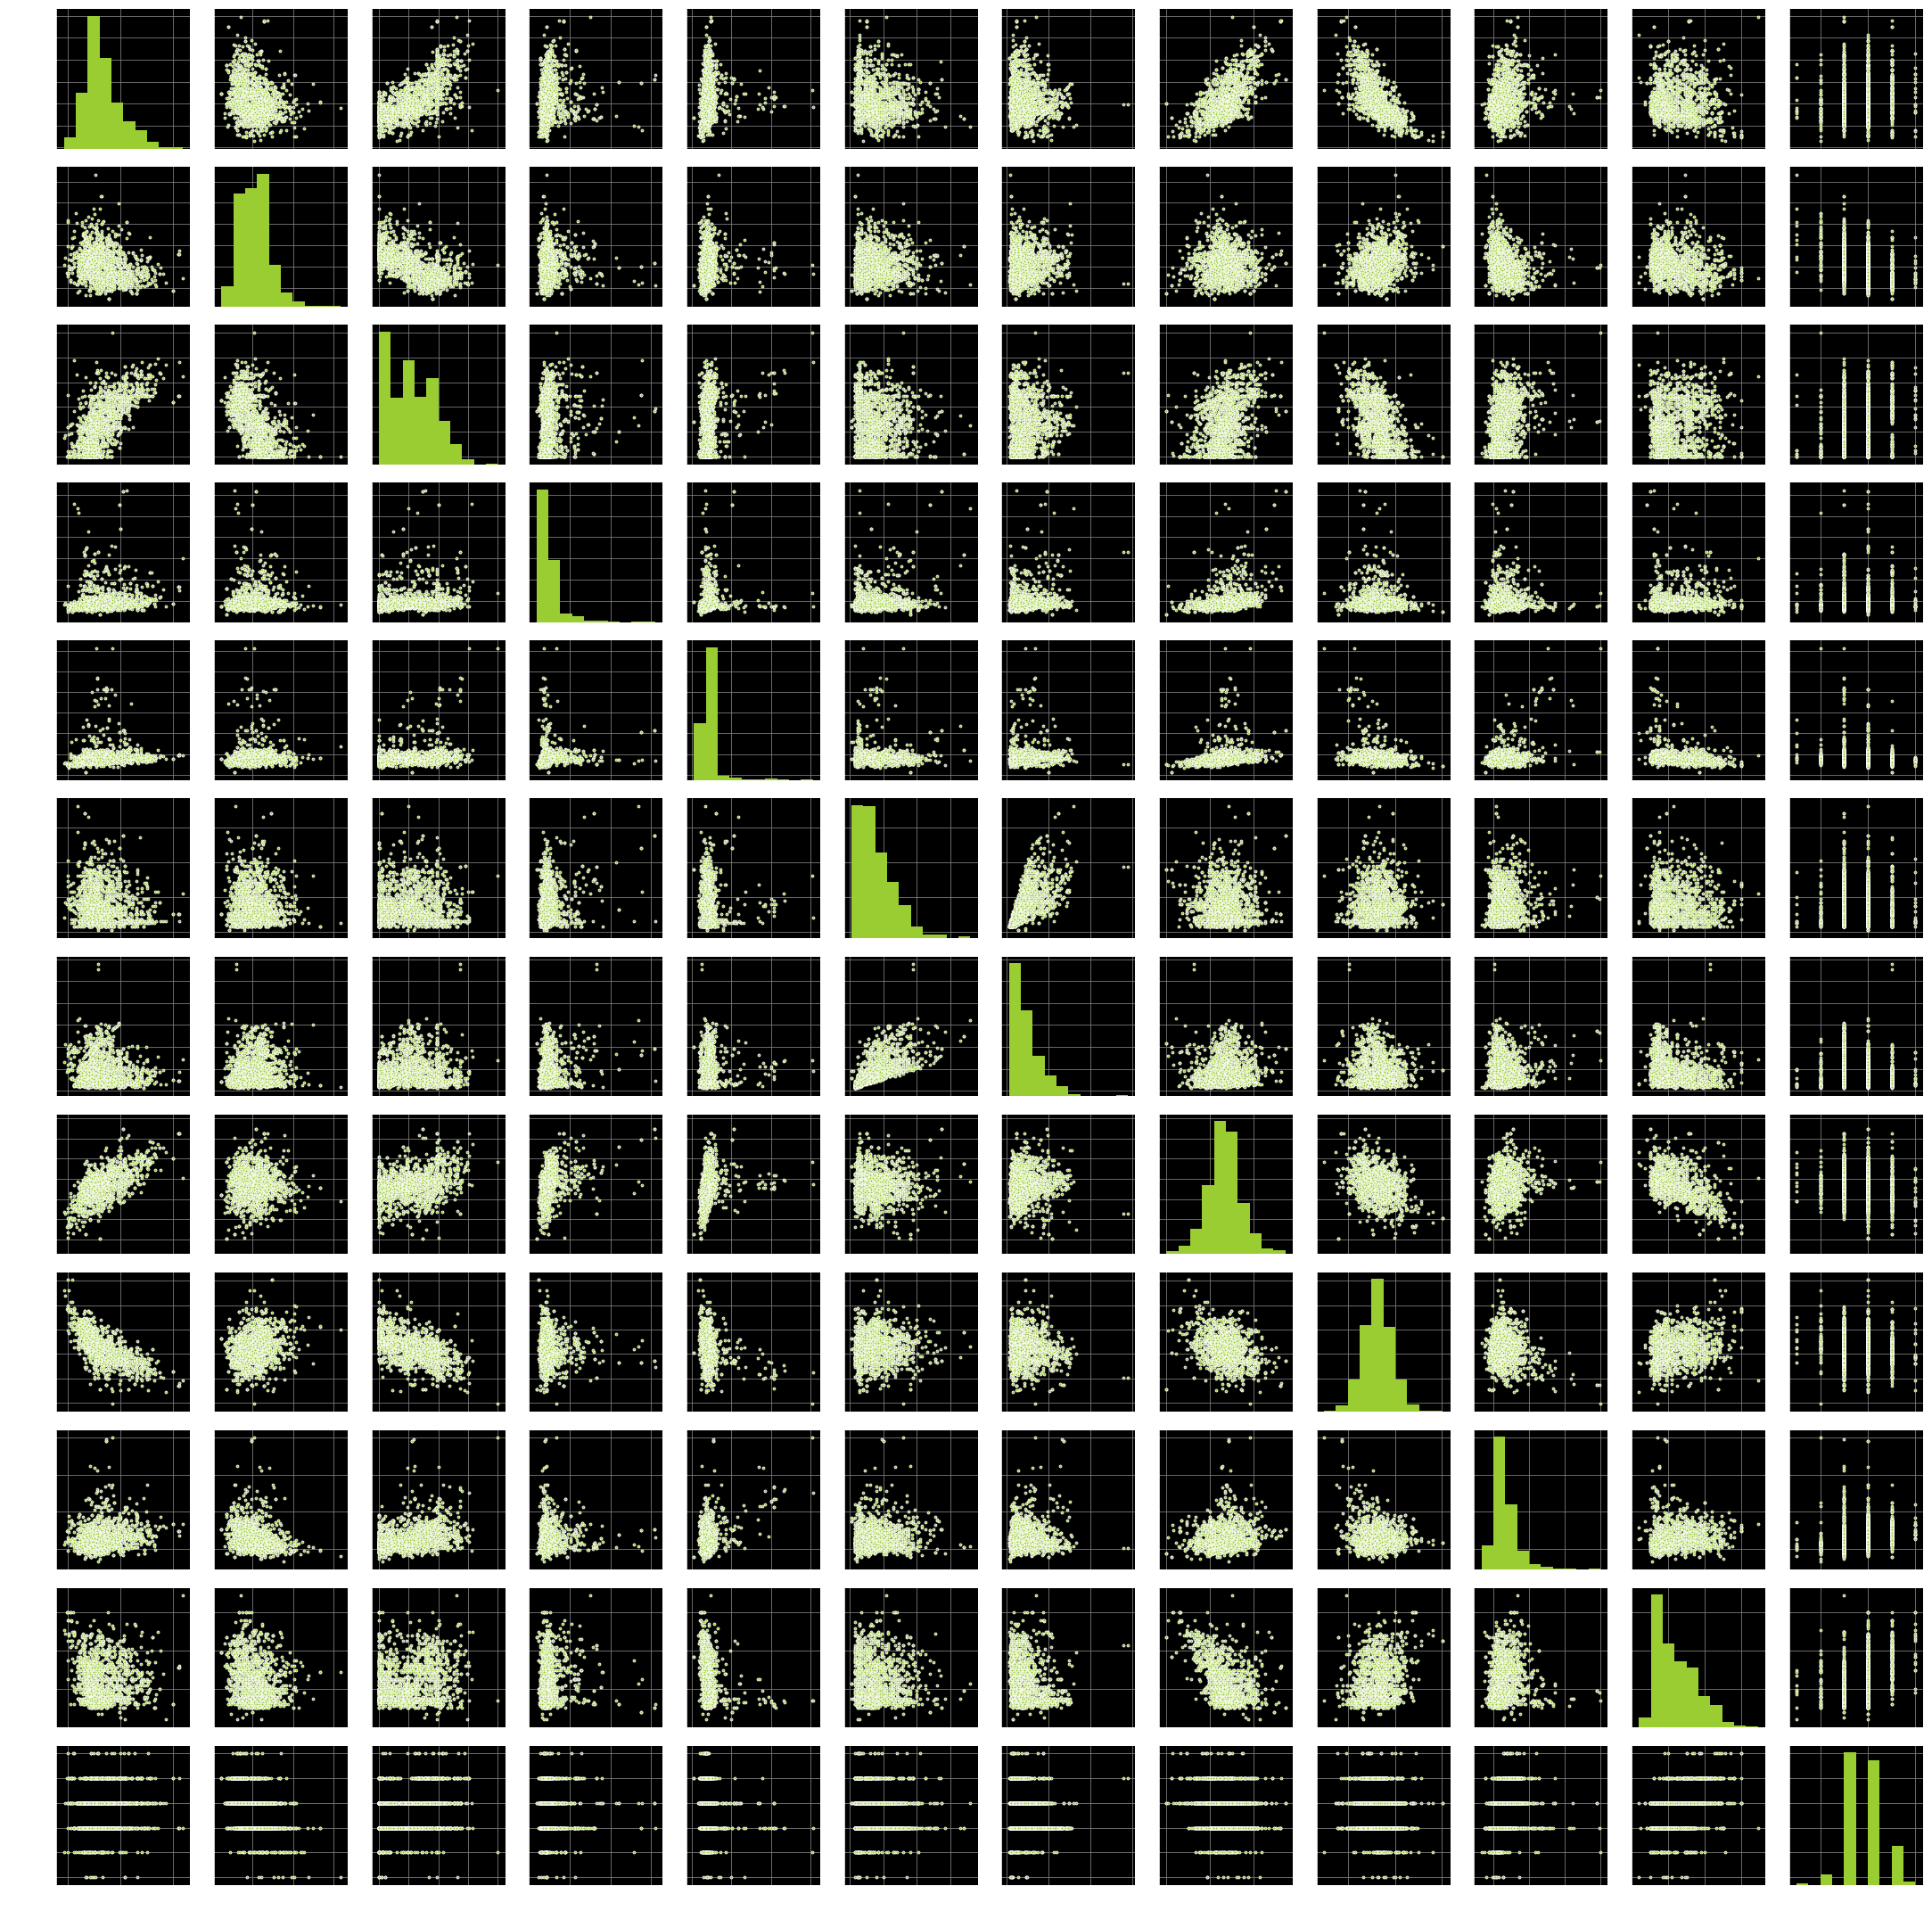

In [16]:
sns.pairplot(df)

In [17]:
corr = df.corr()

In [ ]:
sns.heatmap(1)

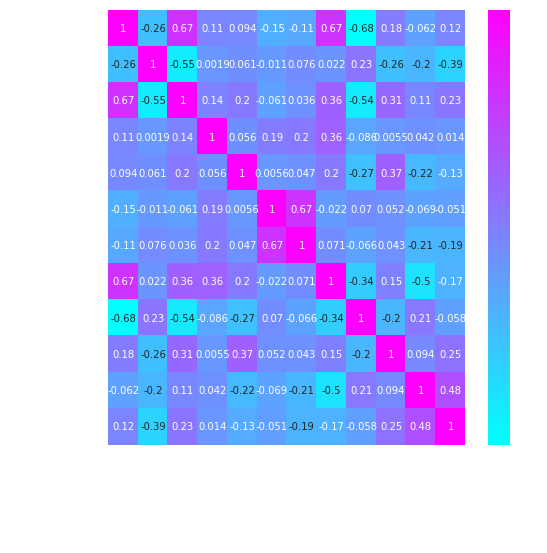

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='cool', annot=True)

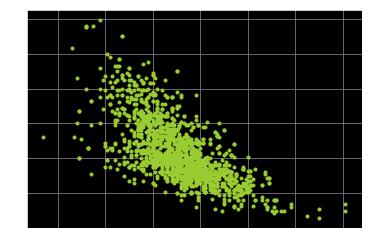

In [21]:
plt.scatter(df['pH'], df['fixed acidity'])

#### 総合問題3-2

In [99]:
df2 = pd.read_csv('./student-mat.csv', sep=';')

In [115]:
df2_f = np.array(df2[df2['sex'] == 'F'].loc[:,'G1'])
df2_m = np.array(df2[df2['sex'] == 'M'].loc[:,'G1'])

In [156]:
df2_f = np.sort(df2_f)
df2_m = np.sort(df2_m)

In [169]:
x_f = (np.arange(len(df2_f))+1) / len(df2_f)
y_f = np.cumsum(df2_f) / df2_f.sum()
x_m = (np.arange(len(df2_m))+1) / len(df2_m)
y_m = np.cumsum(df2_m) / df2_m.sum()

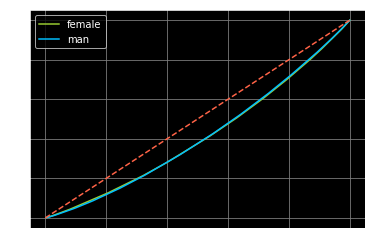

In [212]:
plt.plot( x_f, y_f, label='female')
plt.plot(x_m, y_m, label='man')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100),ls='--')
plt.legend()

In [189]:
def gini(x):
    gini = 0
    mean = x.mean()
    n = len(x)
    for i in range(0, n):
        for j in range(i+1, n):
            gini += np.abs((x[i] - x[j]))
    return 2 * gini / (2 * n**2 * mean)

In [202]:
def gini2(x, y):
    return (np.abs(x - y)).mean() * 2

In [203]:
print('GINI_F = {}'.format(gini(df2_f)))
print('GINI_F = {}'.format(gini(df2_m)))

GINI_F = 0.1723782950865341
GINI_F = 0.17197351667939903


In [205]:
print('GINI_F = {}'.format(gini2(x_f, y_f)))
print('GINI_F = {}'.format(gini2(x_m, y_m)))

GINI_F = 0.17237829508653416
GINI_F = 0.171973516679399
